In [1]:
import re
from pathlib import Path

import networkx as nx
import pandas as pd
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

from graph_stats import graph_stats_from_file

/Users/diegolarraguibel/Desktop/Semestre 2025-2/Aprendizaje en Grafos/github_aprendizaje_grafos/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ENRICHED_DIR = Path("../data/city_graphs_enriched")
gexf_files = sorted(ENRICHED_DIR.glob("grafo_*_con_ae_embeddings.gexf"))

print(f"Se encontraron {len(gexf_files)} grafos enriquecidos.")
for f in gexf_files:
    print(" -", f.name)


Se encontraron 10 grafos enriquecidos.
 - grafo_berlin_con_ae_embeddings.gexf
 - grafo_bogota_con_ae_embeddings.gexf
 - grafo_buenos_aires_con_ae_embeddings.gexf
 - grafo_greater_london_con_ae_embeddings.gexf
 - grafo_johannesburg_con_ae_embeddings.gexf
 - grafo_lima_con_ae_embeddings.gexf
 - grafo_paris_con_ae_embeddings.gexf
 - grafo_quito_con_ae_embeddings.gexf
 - grafo_rome_con_ae_embeddings.gexf
 - grafo_washington_dc_con_ae_embeddings.gexf


In [3]:
rows = []

for path in tqdm(gexf_files, desc="Procesando grafos enriquecidos"):
    try:
        stats = graph_stats_from_file(path)
        rows.append(stats)
    except Exception as e:
        print(f"[error] {path.name}: {e}")

stats_df = pd.DataFrame(rows)

Procesando grafos enriquecidos:   0%|          | 0/10 [00:00<?, ?it/s]

Procesando grafos enriquecidos: 100%|██████████| 10/10 [01:32<00:00,  9.23s/it]


In [4]:
stats_df.sort_values("n_nodes", ascending=False)

,city,file,is_directed,n_nodes,n_edges,density,avg_degree,n_weak_components,n_strong_components,giant_n_nodes,giant_frac_nodes,n_nodes_with_embeddings,frac_nodes_with_embeddings
3,greater_london,grafo_greater_london_con_ae_embeddings.gexf,False,79500,1045050,0.000331,26.290566,7969,None,14922,0.187698,77041,0.969069
6,paris,grafo_paris_con_ae_embeddings.gexf,False,66156,2325458,0.001063,70.302255,513,None,55229,0.834830,66156,1.000000
0,berlin,grafo_berlin_con_ae_embeddings.gexf,False,49370,677966,0.000556,27.464695,3661,None,20898,0.423293,49219,0.996941
2,buenos_aires,grafo_buenos_aires_con_ae_embeddings.gexf,False,45526,1302719,0.001257,57.229671,568,None,39433,0.866164,45526,1.000000
5,lima,grafo_lima_con_ae_embeddings.gexf,False,31474,400542,0.000809,25.452246,1805,None,9753,0.309875,31335,0.995584
1,bogota,grafo_bogota_con_ae_embeddings.gexf,False,30627,687122,0.001465,44.870343,1073,None,16723,0.546021,30274,0.988474
8,rome,grafo_rome_con_ae_embeddings.gexf,False,21754,223064,0.000943,20.507861,2169,None,7283,0.334789,21754,1.000000
4,johannesburg,grafo_johannesburg_con_ae_embeddings.gexf,False,6307,22837,0.001148,7.241795,2480,None,121,0.019185,6291,0.997463
9,washington_dc,grafo_washington_dc_con_ae_embeddings.gexf,False,5127,82978,0.006315,32.369027,104,None,3745,0.730447,5127,1.000000
7,quito,grafo_quito_con_ae_embeddings.gexf,False,2064,69717,0.032746,67.555233,17,None,1962,0.950581,2064,1.000000


/var/folders/w5/kmvyzkpj2q1fyf7tnn3nqwb40000gn/T/ipykernel_78841/4157038635.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(stats_df_sorted["city"], rotation=45, ha="right")
/var/folders/w5/kmvyzkpj2q1fyf7tnn3nqwb40000gn/T/ipykernel_78841/4157038635.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(stats_df_sorted["city"], rotation=45, ha="right")


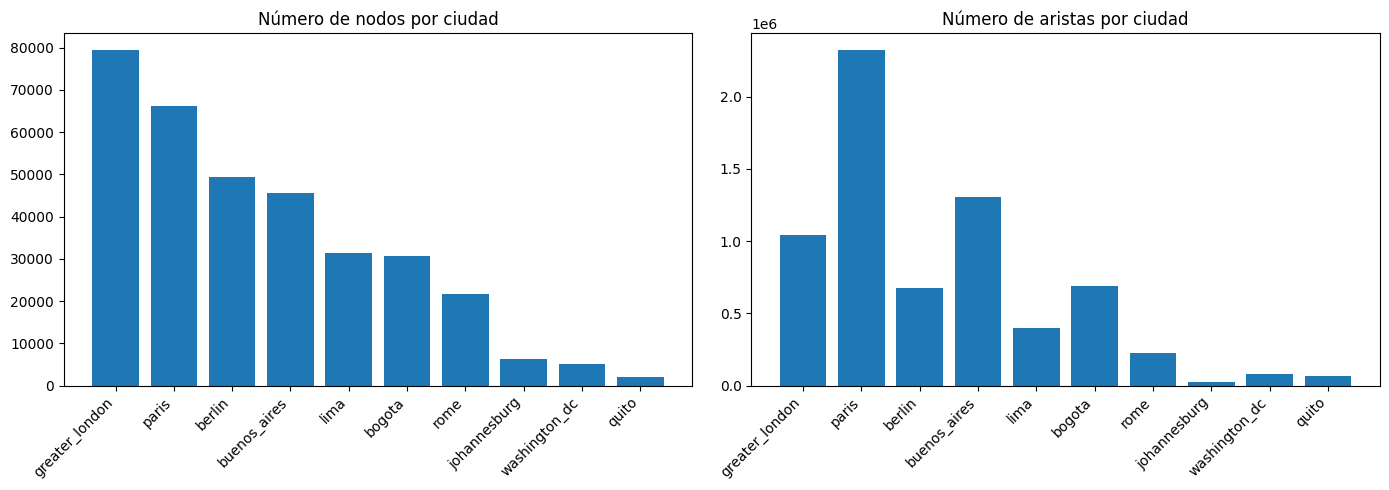

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

stats_df_sorted = stats_df.sort_values("n_nodes", ascending=False)

axes[0].bar(stats_df_sorted["city"], stats_df_sorted["n_nodes"])
axes[0].set_title("Número de nodos por ciudad")
axes[0].set_xticklabels(stats_df_sorted["city"], rotation=45, ha="right")

axes[1].bar(stats_df_sorted["city"], stats_df_sorted["n_edges"])
axes[1].set_title("Número de aristas por ciudad")
axes[1].set_xticklabels(stats_df_sorted["city"], rotation=45, ha="right")

plt.tight_layout()
plt.show()
